In [1]:
from cheetah import Beam
from gym.wrappers import FlattenObservation, Monitor, TimeLimit
from stable_baselines3 import TD3

from environments.ocelot import ARESEAOcelot
from environments.simulation import ARESEACheetah

initializing ocelot...


In [4]:
run_name = "pretty-jazz-258"

In [5]:
model = TD3.load(f"models/{run_name}")
model

In [6]:
ocenv = ARESEAOcelot()
ocenv = TimeLimit(ocenv, max_episode_steps=50)
ocenv = FlattenObservation(ocenv)
ocenv

<FlattenObservation<TimeLimit<ARESEAOcelot instance>>>

In [7]:
chenv = ARESEACheetah()
chenv = TimeLimit(chenv, max_episode_steps=50)
chenv = FlattenObservation(chenv)
chenv

<FlattenObservation<TimeLimit<ARESEACheetah instance>>>

In [8]:
ocobs = ocenv.reset()
chobs = chenv.reset()

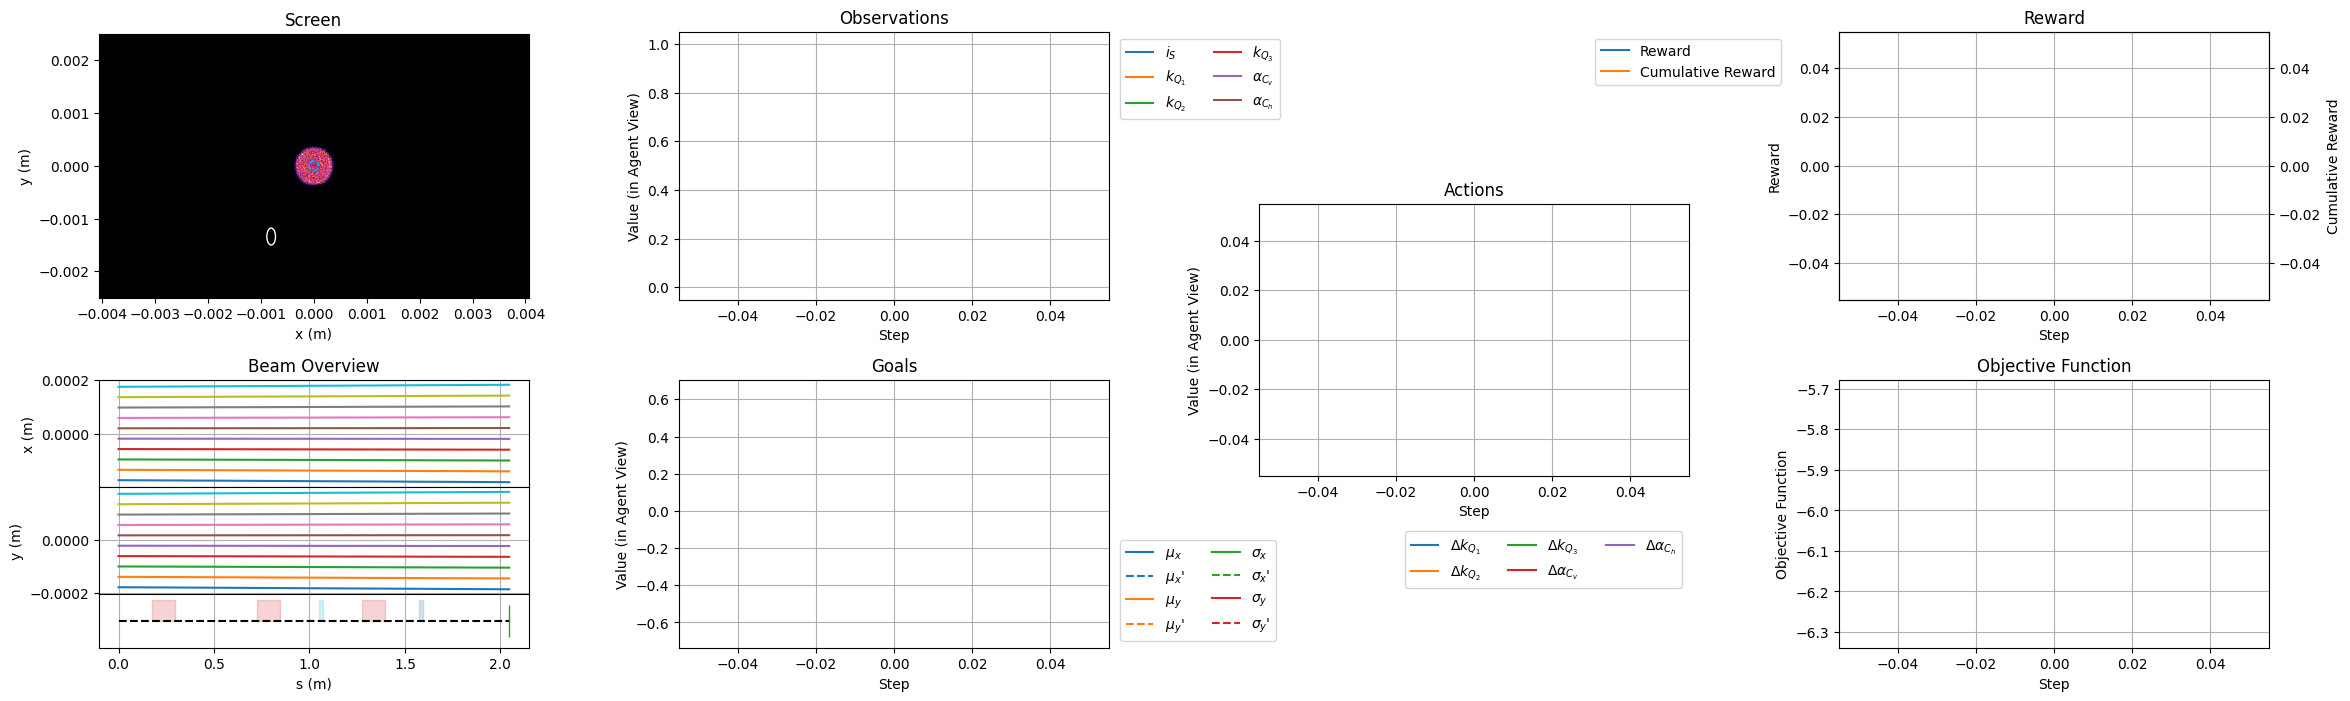

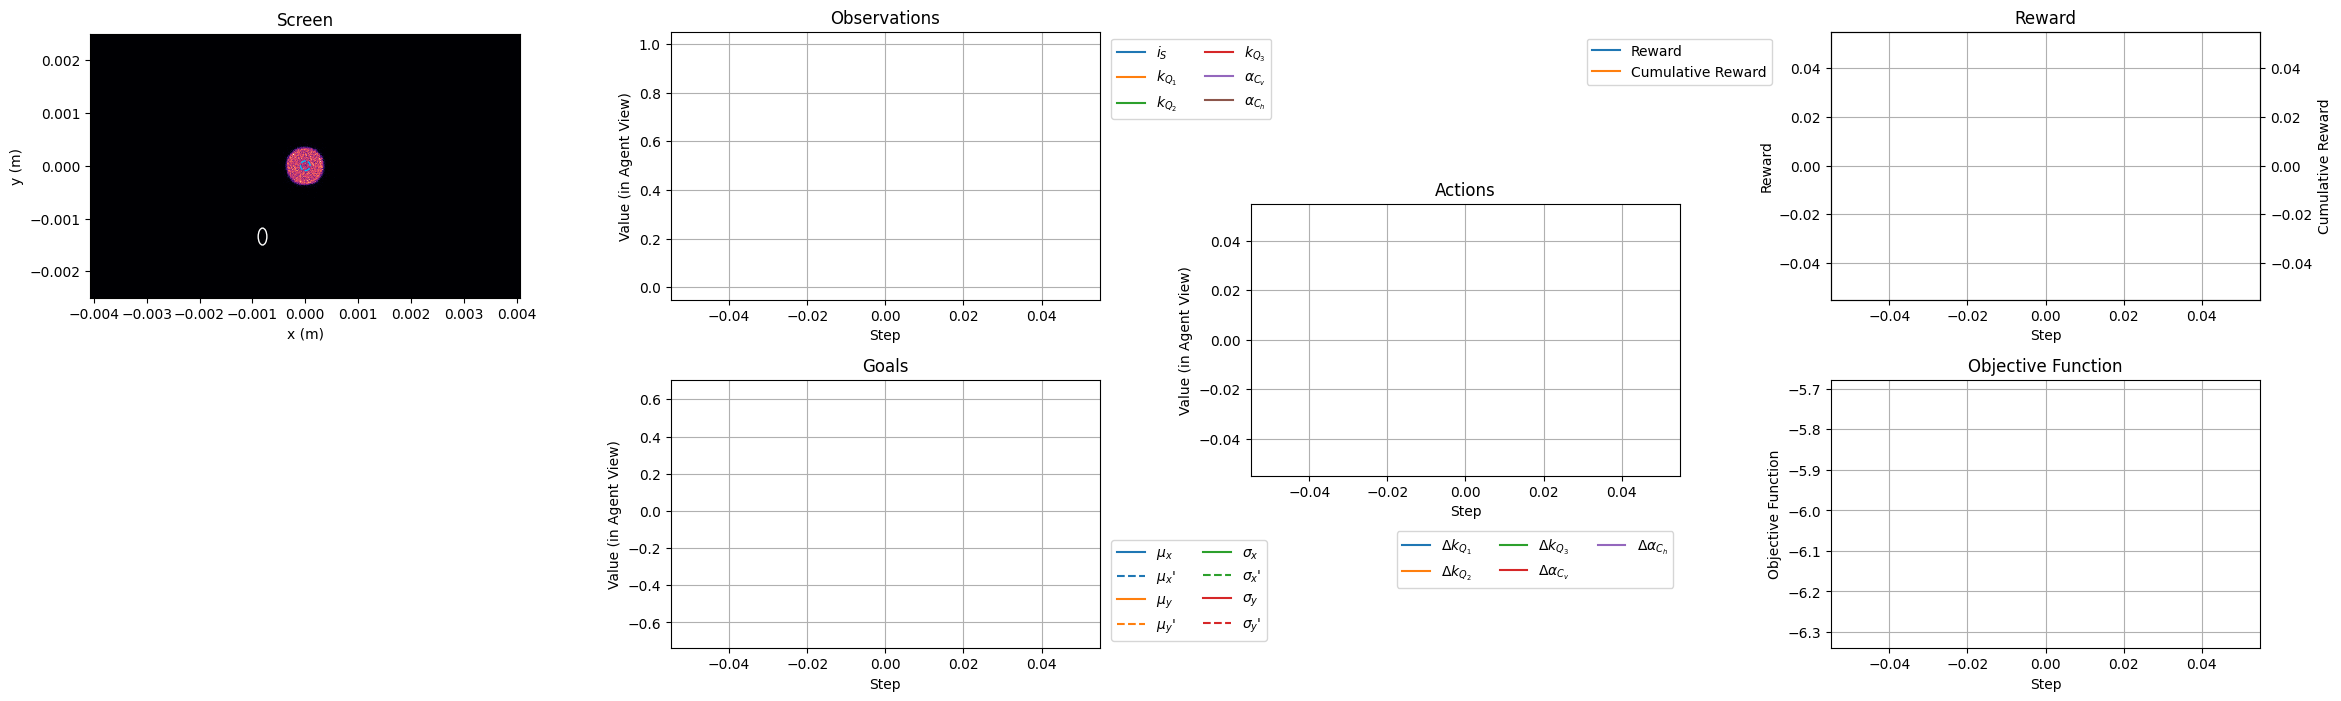

In [9]:
chenv.render()
ocenv.render()

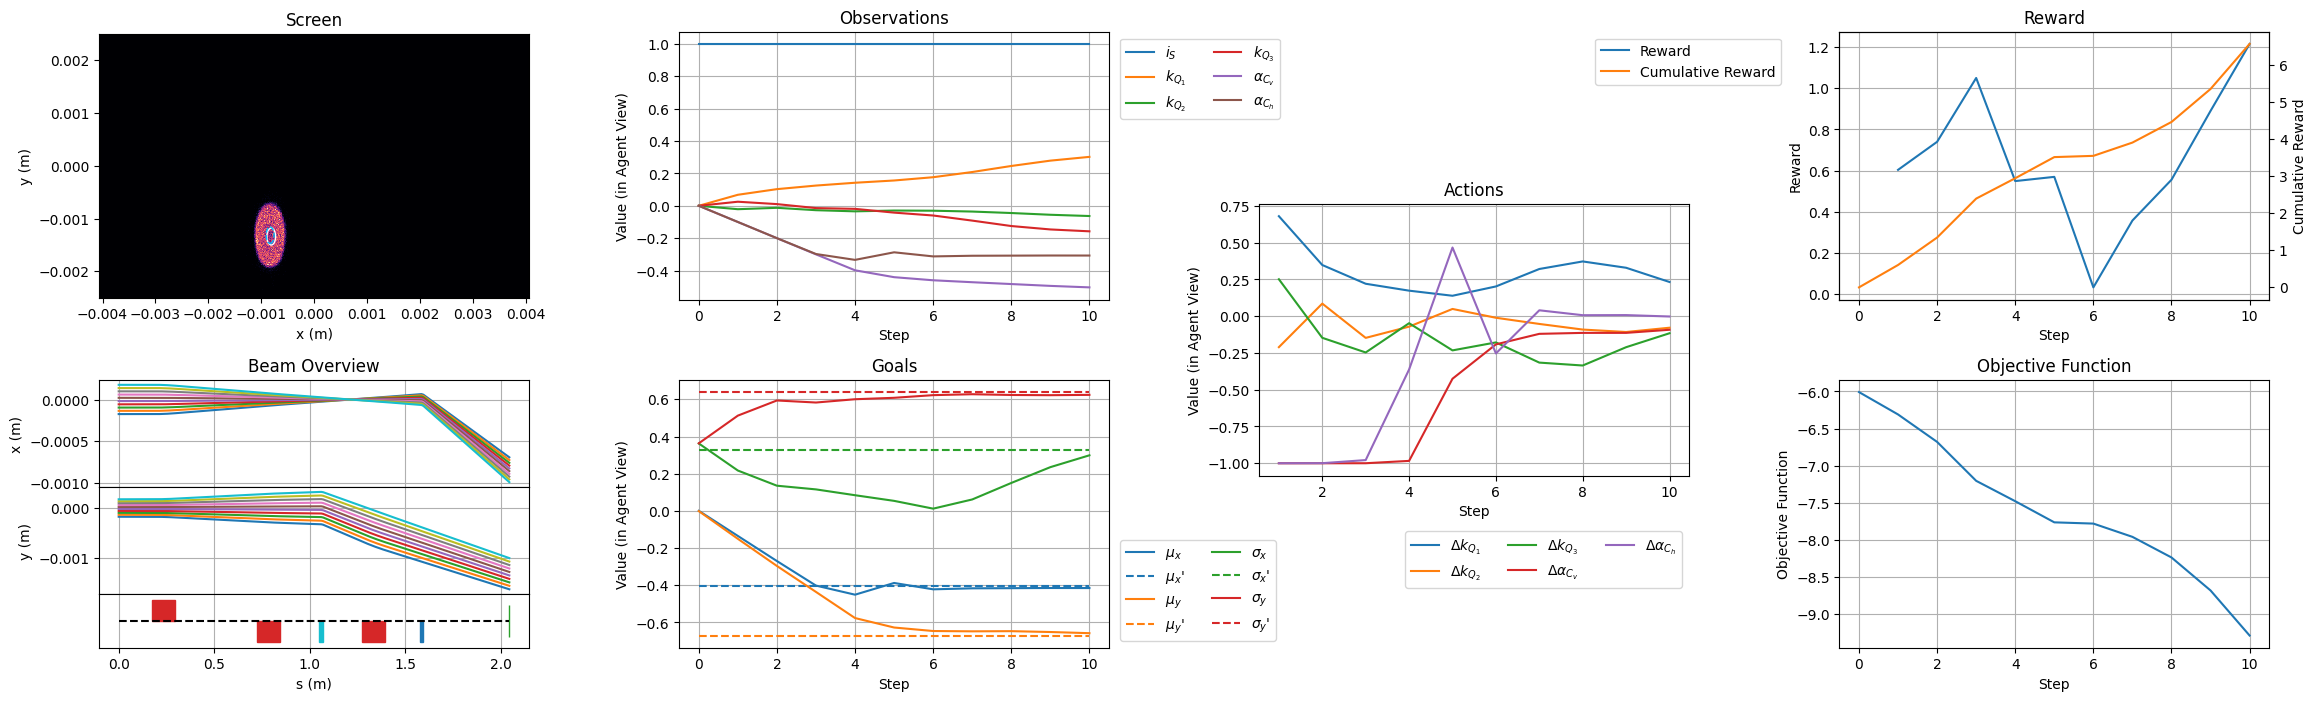

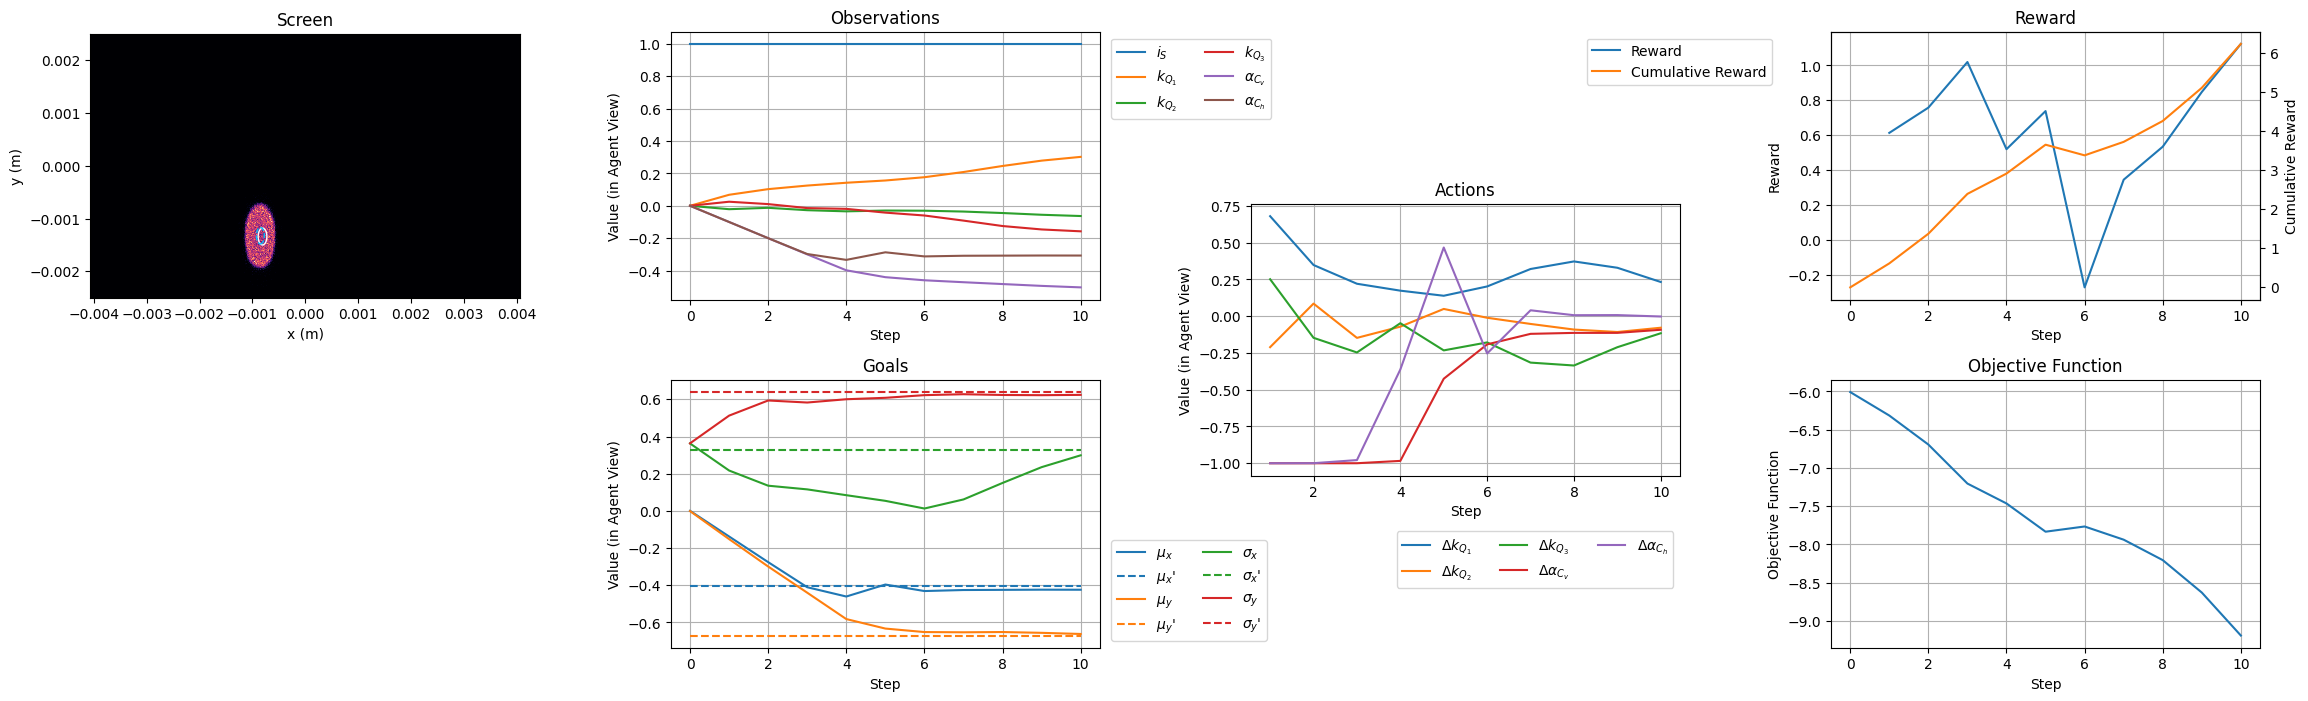

In [19]:
action, _ = model.predict(chobs)

chobs, _, _, _ = chenv.step(action)
ocenv.step(action)

chenv.render()
ocenv.render()

In [14]:
chenv.segment.AREAMCVM1.transfer_map(100e6)

tensor([[ 1.0000e+00,  2.0000e-02,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  2.0000e-02,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
          0.0000e+00, -6.0000e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  1.0000e+00]])

In [18]:
chenv.segment

Segment([Drift(length=0.00, name="AREASOLA1"), Drift(length=0.18, name="Drift_AREASOLA1"), Quadrupole(length=0.12, k1=3.0865577459335327, name="AREAMQZM1"), Drift(length=0.43, name="Drift_AREAMQZM1"), Quadrupole(length=0.12, k1=-0.37336403131484985, name="AREAMQZM2"), Drift(length=0.20, name="Drift_AREAMQZM2"), VerticalCorrector(length=0.02, angle=-0.0005999996501486748, name="AREAMCVM1"), Drift(length=0.20, name="Drift_AREAMCVM1"), Quadrupole(length=0.12, k1=0.3143270015716553, name="AREAMQZM3"), Drift(length=0.18, name="Drift_AREAMQZM3"), HorizontalCorrector(length=0.02, angle=-0.0011996913235634565, name="AREAMCHM1"), Drift(length=0.45, name="Drift_AREAMCHM1"), Screen(resolution=(2448, 2040), pixel_size=(3.3198e-06, 2.4469e-06), binning=4, name="AREABSCR1")])

In [17]:
ocenv.cell